In [5]:
import tensorflow as tf 
import keras

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

print(tf.__version__)


Default GPU Device:/device:GPU:0
2.8.0


In [6]:
# preliminaries
import datetime
import numpy as np
np.random.seed(42)
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# standard magic
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# Reference
https://www.tensorflow.org/tutorials/keras/classification

In [5]:
import os
from tensorflow.keras.models import load_model

modelName = "assignment7_best_model"
model_path = os.path.join(".", modelName)   

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

def MyModel(x_test, y_test, model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    
    
    return predictions

# Assign to variable my_model the model that solves task 3.2
my_model = None # CHANGE None to your model !

saveModel(my_model, model_path)
predicts = MyModel(x_test, y_test, model_path)


AlreadyExistsError: Another metric with the same name already exists.

# The problem

You will create several Neural Networks to solve a classification problem that is a slight variant
of the MNIST digit classification problem.

The assignment really involves little more than playing around with that example.

The objective is to ensure that you are able to write and run simple programs using Keras.

# The Data

The dataset is called Fashion MNIST.

Rather than classifying images into one of ten digits,
you will classify images of clothing items into one of ten classes.

Here's the code to get the data.

In [7]:
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
x_train.shape
y_train.shape
y_train
x_test.shape
y_test.shape

(60000, 28, 28)

(60000,)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

(10000, 28, 28)

(10000,)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<Figure size 640x480 with 0 Axes>

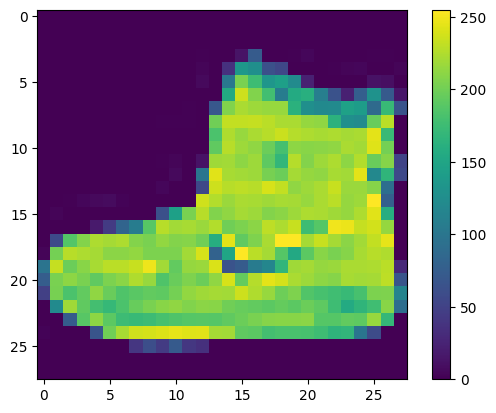

In [10]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [11]:
# scale to 0~1
x_train, x_test = x_train / x_train[0].max(), x_test / x_test[0].max()

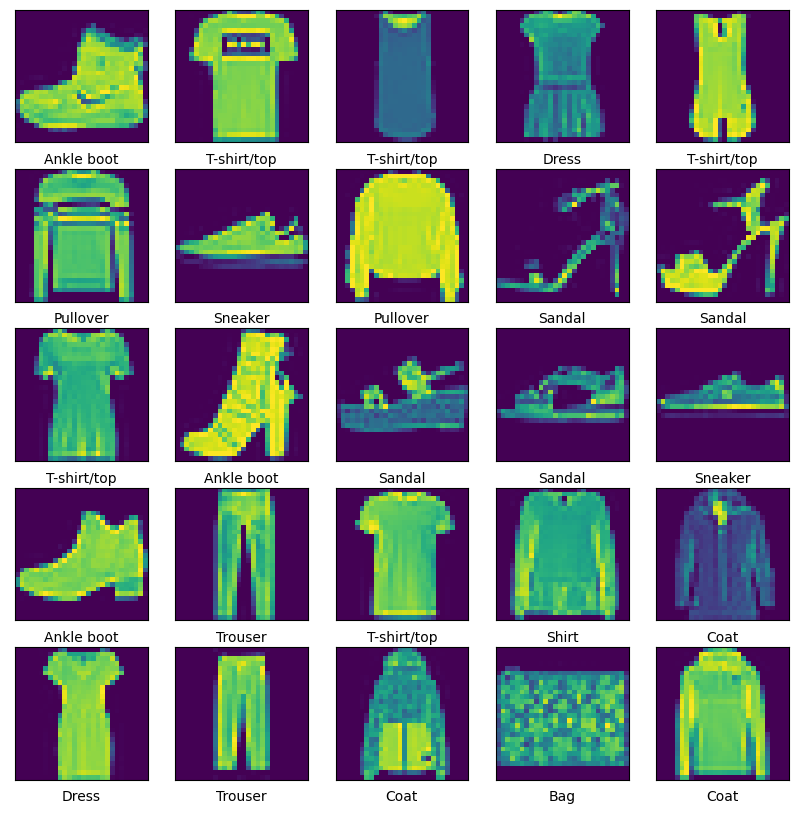

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show();

# Tasks

For each task
- create the Neural Network as specified
- train it on the training data set
- evaluate it on the test data set


## Task 1

Create a one layer Neural Network to perform classification (e.g., logistic regression) as we demonstrated in class.

No layers other than the one for classification.

In [27]:
one_layer_model = Sequential([
    layers.Flatten(input_shape=(28, 28)), 
    layers.Dense(10, activation=tf.nn.softmax)
    ])


In [28]:
one_layer_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
                        metrics='accuracy')
one_layer_model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8247 - accuracy: 0.7394
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5926 - accuracy: 0.8073
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5424 - accuracy: 0.8214
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5155 - accuracy: 0.8285
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4980 - accuracy: 0.8334
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4852 - accuracy: 0.8375
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4756 - accuracy: 0.8400
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4676 - accuracy: 0.8425
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4614 - accuracy: 0.8449
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.455

In [29]:
test_loss, test_acc = one_layer_model.evaluate(x_test,  y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.8328


In [36]:
predictions = one_layer_model.predict(x_test)
np.argmax(predictions[130])
y_test[130]

4

4

# Task 2 (9 parts)

You will evaluate out of sample accuracy for several models and create a plot
- For number of layers in 2, 3,4 (more if you like)
- For number of units per layer in 10, 50, 200 (more if you like)
    - Using *same* number of units for each layer

The combination of choices for number of layers and number of units per layer gives you (at least) 9 models.

- Evaluate the out of sample accuracy for each of the 9 models.
- Present the results in a table (created by code)
- Create a *single plot*
    - Horizontal axis: number of units per layer
    - Vertical axis: out of sample accuracy
    - 3 traces in the plot, one for each choice of number of layers
        - e.g., one line in the plot for L=2, another line in the plot for L=3, and another line for L=4


In [62]:
def testModels(nums=[10, 50, 200], o='adam', l='sparse_categorical_crossentropy',
               m='accuracy', e=10, x=x_test, y=y_test, layer=[2,3,4]):
    loss_arr = []
    accuracy_arr = []
  
    for n in nums:
        model1 = Sequential([
            layers.Flatten(input_shape=(28, 28)), 
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(10, activation=tf.nn.softmax),
            ])
        model1.compile(optimizer=o, loss=l, metrics=m)
        model1.fit(x_train, y_train, epochs=e)
        loss, accuracy = model1.evaluate(x, y)
        loss_arr.append(loss)
        accuracy_arr.append(accuracy)
  
    for n in nums:
        model2 = Sequential([
            layers.Flatten(input_shape=(28, 28)), 
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(10, activation=tf.nn.softmax),
            ])
        model2.compile(optimizer=o, loss=l, metrics=m)
        model2.fit(x_train, y_train, epochs=e)
        loss, accuracy = model2.evaluate(x, y)
        loss_arr.append(loss)
        accuracy_arr.append(accuracy)
  
    for n in nums:
        model3 = Sequential([
            layers.Flatten(input_shape=(28, 28)), 
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(10, activation=tf.nn.softmax),
            ])
        model3.compile(optimizer=o, loss=l, metrics=m)
        model3.fit(x_train, y_train, epochs=e)
        loss, accuracy = model3.evaluate(x, y)
        loss_arr.append(loss)
        accuracy_arr.append(accuracy)
  
    ind = []
    for lyr in layer:
        for n in nums:
            i = f'{lyr} layers, {n} nodes'
            ind.append(i)

    data = {'loss':loss_arr, 'accuracy':accuracy_arr}
    res = pd.DataFrame(data=data, index=ind)
    return res

In [63]:
res = testModels()

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4102 - accuracy: 0.6031
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8774 - accuracy: 0.6979
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7366 - accuracy: 0.7605
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6530 - accuracy: 0.7912
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6040 - accuracy: 0.8012
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5742 - accuracy: 0.8075
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5533 - accuracy: 0.8121
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5338 - accuracy: 0.8164
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5130 - accuracy: 0.8334
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.5543 

In [64]:
res

,loss,accuracy
"2 layers, 10 nodes",0.554282,0.8195
"2 layers, 50 nodes",0.535398,0.8217
"2 layers, 200 nodes",0.533460,0.8191
"3 layers, 10 nodes",0.494408,0.8357
"3 layers, 50 nodes",0.540549,0.7930
"3 layers, 200 nodes",0.549605,0.7858
"4 layers, 10 nodes",0.611701,0.7526
"4 layers, 50 nodes",0.723939,0.6765
"4 layers, 200 nodes",0.568983,0.7986


In [66]:
res_sgd = testModels(o='sgd')

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0411 - accuracy: 0.3435
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6353 - accuracy: 0.4078
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4459 - accuracy: 0.4245
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3500 - accuracy: 0.4409
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2909 - accuracy: 0.4605
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2503 - accuracy: 0.4737
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2196 - accuracy: 0.4848
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1944 - accuracy: 0.4978
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1720 - accuracy: 0.5154
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 1.1554 

In [67]:
res_sgd

,loss,accuracy
"2 layers, 10 nodes",1.155438,0.5320
"2 layers, 50 nodes",1.350100,0.4162
"2 layers, 200 nodes",1.414822,0.4314
"3 layers, 10 nodes",1.714839,0.2017
"3 layers, 50 nodes",2.302349,0.1000
"3 layers, 200 nodes",2.302614,0.1000
"4 layers, 10 nodes",2.300795,0.1886
"4 layers, 50 nodes",2.302614,0.1000
"4 layers, 200 nodes",2.302609,0.1000


sgd is not as good as adam. use adam in following analysis

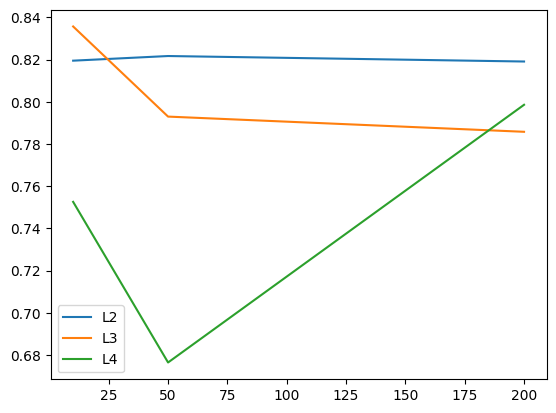

In [83]:
res_1 = res[:3]
res_2 = res[3:6]
res_3 = res[6:]
nodes = [10, 50, 200]

plt.plot(nodes, res_1['accuracy'].array, label='L2')
plt.plot(nodes, res_2['accuracy'].array, label='L3')
plt.plot(nodes, res_3['accuracy'].array, label='L4')
plt.legend()
plt.show()

# Extra credit
- Do a more extensive experiment
    - More layers
    - More choices for number of units per layer
    - Vary number of units per layer
        - Increase number of units with increasing layer number
        - Decrease number of units with increasing layer number
        - Find some other pattern for varying the number of units per layer
- Comment on when your models are either overfitting or underfitting
    - Use numeric justification
    

In [85]:
# more nodes and layers
def testModels_more(nums=[10, 50, 200, 500, 784], o='adam', l='sparse_categorical_crossentropy',
               m='accuracy', e=10, x=x_test, y=y_test, layer=[2,3,5,10]):
    loss_arr = []
    accuracy_arr = []
  
    for n in nums:
        model1 = Sequential([
            layers.Flatten(input_shape=(28, 28)), 
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(10, activation=tf.nn.softmax),
            ])
        model1.compile(optimizer=o, loss=l, metrics=m)
        model1.fit(x_train, y_train, epochs=e)
        loss, accuracy = model1.evaluate(x, y)
        loss_arr.append(loss)
        accuracy_arr.append(accuracy)
  
    for n in nums:
        model2 = Sequential([
            layers.Flatten(input_shape=(28, 28)), 
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(10, activation=tf.nn.softmax),
            ])
        model2.compile(optimizer=o, loss=l, metrics=m)
        model2.fit(x_train, y_train, epochs=e)
        loss, accuracy = model2.evaluate(x, y)
        loss_arr.append(loss)
        accuracy_arr.append(accuracy)
  
    for n in nums:
        model3 = Sequential([
            layers.Flatten(input_shape=(28, 28)), 
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(10, activation=tf.nn.softmax),
            ])
        model3.compile(optimizer=o, loss=l, metrics=m)
        model3.fit(x_train, y_train, epochs=e)
        loss, accuracy = model3.evaluate(x, y)
        loss_arr.append(loss)
        accuracy_arr.append(accuracy)
    
    for n in nums:
        model4 = Sequential([
            layers.Flatten(input_shape=(28, 28)), 
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(n, activation=tf.nn.softmax),
            layers.Dense(10, activation=tf.nn.softmax),
            ])
        model4.compile(optimizer=o, loss=l, metrics=m)
        model4.fit(x_train, y_train, epochs=e)
        loss, accuracy = model3.evaluate(x, y)
        loss_arr.append(loss)
        accuracy_arr.append(accuracy)
    
    ind = []
    for lyr in layer:
        for n in nums:
            i = f'{lyr} layers, {n} nodes'
            ind.append(i)

    data = {'loss':loss_arr, 'accuracy':accuracy_arr}
    res = pd.DataFrame(data=data, index=ind)
    return res

In [86]:
res_more = testModels_more()

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5389 - accuracy: 0.4442
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1511 - accuracy: 0.4909
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0412 - accuracy: 0.5432
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9670 - accuracy: 0.6002
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8612 - accuracy: 0.6866
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7441 - accuracy: 0.7323
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6708 - accuracy: 0.7864
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6122 - accuracy: 0.8049
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5794 - accuracy: 0.8145
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.6147 

1875/1875 [==============================] - 5s 2ms/step - loss: 2.3029 - accuracy: 0.0986
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 2.3028 - accuracy: 0.1000
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3031 - accuracy: 0.0998
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3030 - accuracy: 0.0963
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy: 0.0970
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3030 - accuracy: 0.0972
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy: 0.0983
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.1003
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3030 - accuracy: 0.0962
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy:

In [87]:
res_more

,loss,accuracy
"2 layers, 10 nodes",0.614666,0.8003
"2 layers, 50 nodes",0.489054,0.8358
"2 layers, 200 nodes",0.520476,0.8254
"2 layers, 500 nodes",0.510626,0.8265
"2 layers, 784 nodes",0.538414,0.8006
"3 layers, 10 nodes",0.569798,0.8176
"3 layers, 50 nodes",0.536230,0.7930
"3 layers, 200 nodes",0.580147,0.7761
"3 layers, 500 nodes",0.544072,0.7815
"3 layers, 784 nodes",0.618265,0.7345


constant number [10, 50, 200, 500, 784] of nodes for [2, 3, 5, 10] layers.
2-3 layers had good accuracy; some of them had a little issue with overfitting (10th epoch accuracy slightly larger than out of sample test results)
5-10 layers performed poorly. 

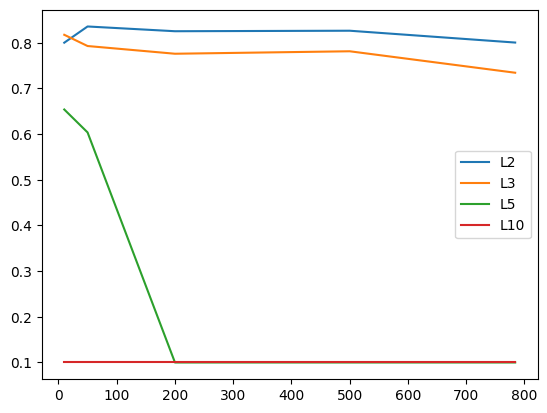

In [88]:
res_more1 = res_more[:5]
res_more2 = res_more[5:10]
res_more3 = res_more[10:15]
res_more4 = res_more[15:20]
nodes = [10, 50, 200, 500, 784]

plt.plot(nodes, res_more1['accuracy'].array, label='L2')
plt.plot(nodes, res_more2['accuracy'].array, label='L3')
plt.plot(nodes, res_more3['accuracy'].array, label='L5')
plt.plot(nodes, res_more4['accuracy'].array, label='L10')
plt.legend()
plt.show()

2/3 layers w/ smaller number of nodes performed well

In [23]:
# nodes: increasing, decreasing, increase then decrease, decrease then increase, constant
# based on preivous exploration, 2-3 layered model has given better results than more layers
def testModels_2layers(pattern=['500_10', '200_10', '128_10', '50_10', '5_10'], o='adam', l='sparse_categorical_crossentropy',
               m='accuracy', e=10, x=x_test, y=y_test, layer=2):
    loss_arr = []
    accuracy_arr = []
  
    model1 = Sequential([
        layers.Flatten(input_shape=(28, 28)), 
        layers.Dense(500, activation=tf.nn.softmax),
        layers.Dense(10, activation=tf.nn.softmax),
        ])
    model1.compile(optimizer=o, loss=l, metrics=m)
    model1.fit(x_train, y_train, epochs=e)
    loss, accuracy = model1.evaluate(x, y)
    loss_arr.append(loss)
    accuracy_arr.append(accuracy)
    
    model2 = Sequential([
        layers.Flatten(input_shape=(28, 28)), 
        layers.Dense(200, activation=tf.nn.softmax),
        layers.Dense(10, activation=tf.nn.softmax),
        ])
    model2.compile(optimizer=o, loss=l, metrics=m)
    model2.fit(x_train, y_train, epochs=e)
    loss, accuracy = model2.evaluate(x, y)
    loss_arr.append(loss)
    accuracy_arr.append(accuracy)
    
    model3 = Sequential([
        layers.Flatten(input_shape=(28, 28)), 
        layers.Dense(128, activation=tf.nn.softmax),
        layers.Dense(10, activation=tf.nn.softmax),
        ])
    model3.compile(optimizer=o, loss=l, metrics=m)
    model3.fit(x_train, y_train, epochs=e)
    loss, accuracy = model3.evaluate(x, y)
    loss_arr.append(loss)
    accuracy_arr.append(accuracy)   
    
    model4 = Sequential([
        layers.Flatten(input_shape=(28, 28)), 
        layers.Dense(50, activation=tf.nn.softmax),
        layers.Dense(10, activation=tf.nn.softmax),
        ])
    model4.compile(optimizer=o, loss=l, metrics=m)
    model4.fit(x_train, y_train, epochs=e)
    loss, accuracy = model4.evaluate(x, y)
    loss_arr.append(loss)
    accuracy_arr.append(accuracy)
    
    model5 = Sequential([
        layers.Flatten(input_shape=(28, 28)), 
        layers.Dense(5, activation=tf.nn.softmax),
        layers.Dense(10, activation=tf.nn.softmax),
        ])
    model5.compile(optimizer=o, loss=l, metrics=m)
    model5.fit(x_train, y_train, epochs=e)
    loss, accuracy = model5.evaluate(x, y)
    loss_arr.append(loss)
    accuracy_arr.append(accuracy)
    
    data = {'loss':loss_arr, 'accuracy':accuracy_arr}
    res = pd.DataFrame(data=data, index=pattern)
    return res

In [24]:
res_2layers = testModels_2layers()

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4001 - accuracy: 0.6007
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8556 - accuracy: 0.6618
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7282 - accuracy: 0.6888
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6806 - accuracy: 0.7127
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6382 - accuracy: 0.7375
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6099 - accuracy: 0.7470
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5753 - accuracy: 0.7901
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5256 - accuracy: 0.8219
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4991 - accuracy: 0.8311
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.5213 

In [26]:
res_2layers

,loss,accuracy
500_10,0.521314,0.8264
200_10,0.564096,0.7943
128_10,0.514666,0.8317
50_10,0.554682,0.7944
5_10,0.630168,0.7943


2 layer models generally all performed well. no significant overfitting observed. 50-> 10 had the most overfitting issue but was not significant

In [16]:
# nodes: increasing, decreasing, increase then decrease, decrease then increase, constant
# based on preivous exploration, 2-3 layered model has given better results than more layers
def testModels_3layers(pattern=['200_50_10', '50_200_10', '50_30_10'], o='adam', l='sparse_categorical_crossentropy',
               m='accuracy', e=10, x=x_test, y=y_test, layer=3):
    loss_arr = []
    accuracy_arr = []
  
    model1 = Sequential([
        layers.Flatten(input_shape=(28, 28)), 
        layers.Dense(200, activation=tf.nn.softmax),
        layers.Dense(50, activation=tf.nn.softmax),
        layers.Dense(10, activation=tf.nn.softmax),
        ])
    model1.compile(optimizer=o, loss=l, metrics=m)
    model1.fit(x_train, y_train, epochs=e)
    loss, accuracy = model1.evaluate(x, y)
    loss_arr.append(loss)
    accuracy_arr.append(accuracy)
    
    model2 = Sequential([
        layers.Flatten(input_shape=(28, 28)), 
        layers.Dense(50, activation=tf.nn.softmax),
        layers.Dense(200, activation=tf.nn.softmax),
        layers.Dense(10, activation=tf.nn.softmax),
        ])
    model2.compile(optimizer=o, loss=l, metrics=m)
    model2.fit(x_train, y_train, epochs=e)
    loss, accuracy = model2.evaluate(x, y)
    loss_arr.append(loss)
    accuracy_arr.append(accuracy)
    
    model3 = Sequential([
        layers.Flatten(input_shape=(28, 28)), 
        layers.Dense(50, activation=tf.nn.softmax),
        layers.Dense(30, activation=tf.nn.softmax),
        layers.Dense(10, activation=tf.nn.softmax),
        ])
    model3.compile(optimizer=o, loss=l, metrics=m)
    model3.fit(x_train, y_train, epochs=e)
    loss, accuracy = model3.evaluate(x, y)
    loss_arr.append(loss)
    accuracy_arr.append(accuracy)    
  
    data = {'loss':loss_arr, 'accuracy':accuracy_arr}
    res = pd.DataFrame(data=data, index=pattern)
    return res

In [17]:
res_3layers = testModels_3layers()

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7194 - accuracy: 0.6506
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7766 - accuracy: 0.7466
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6270 - accuracy: 0.7534
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5898 - accuracy: 0.7574
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5676 - accuracy: 0.7679
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5264 - accuracy: 0.7992
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4945 - accuracy: 0.8159
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4736 - accuracy: 0.8226
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4578 - accuracy: 0.8285
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.5131 

In [18]:
res_3layers

,loss,accuracy
200_50_10,0.513136,0.8032
50_200_10,0.522992,0.8063
50_30_10,0.532958,0.7959


3 layer models are also prominent. accuracy generally worse than 2 layered models as expected; slightly more overfitting observed. 

In [43]:
# best model so far: 2 layers, 128 and 10 nodes (of course things can be different on different runs)
best_model = Sequential([
    layers.Flatten(input_shape=(28, 28)), 
    layers.Dense(120, activation=tf.nn.softmax),
    layers.Dense(10, activation=tf.nn.softmax),
    ])
best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                        metrics='accuracy')
best_model.fit(x_train, y_train, epochs=10)
loss, accuracy = best_model.evaluate(x_test, y_test)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3818 - accuracy: 0.6523
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7713 - accuracy: 0.7409
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6216 - accuracy: 0.7602
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5777 - accuracy: 0.7648
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5591 - accuracy: 0.7694
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5484 - accuracy: 0.7710
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5378 - accuracy: 0.7788
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5226 - accuracy: 0.7994
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5015 - accuracy: 0.8237
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.482

313/313 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.8218


In [44]:
import os
from tensorflow.keras.models import load_model

modelName = "assignment7_best_model"
model_path = os.path.join(".", modelName)   

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

def MyModel(x_test, y_test, model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = model.predict(x_test)
   
    return predictions

# Assign to variable my_model the model that solves task 3.2
my_model = best_model # CHANGE None to your model !

saveModel(best_model, model_path)
predicts = MyModel(x_test, y_test, model_path)


Directory .\assignment7_best_model already exists, files will be over-written.
Model saved in directory .\assignment7_best_model; create an archive of this directory and submit with your assignment.
